# **Downloading Dataset**

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

The syntax of the command is incorrect.
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '~/.kaggle/kaggle.json': No such file or directory


Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown




  0%|          | 0.00/121M [00:00<?, ?B/s]
  1%|          | 1.00M/121M [00:00<01:08, 1.83MB/s]
  2%|▏         | 2.00M/121M [00:00<00:36, 3.42MB/s]
  2%|▏         | 3.00M/121M [00:00<00:26, 4.70MB/s]
  3%|▎         | 4.00M/121M [00:00<00:22, 5.43MB/s]
  4%|▍         | 5.00M/121M [00:01<00:24, 4.94MB/s]
  5%|▍         | 6.00M/121M [00:01<00:21, 5.62MB/s]
  6%|▌         | 7.00M/121M [00:01<00:19, 6.15MB/s]
  7%|▋         | 8.00M/121M [00:01<00:20, 5.80MB/s]
  7%|▋         | 9.00M/121M [00:01<00:18, 6.39MB/s]
  8%|▊         | 10.0M/121M [00:01<00:18, 6.21MB/s]
  9%|▉         | 11.0M/121M [00:02<00:19, 5.87MB/s]
 10%|▉         | 12.0M/121M [00:02<00:18, 6.07MB/s]
 11%|█         | 13.0M/121M [00:02<00:20, 5.53MB/s]
 12%|█▏        | 14.0M/121M [00:02<00:19, 5.81MB/s]
 12%|█▏        | 15.0M/121M [00:02<00:19, 5.74MB/s]
 13%|█▎        | 16.0M/121M [00:03<00:18, 5.88MB/s]
 14%|█▍        | 17.0M/121M [00:03<00:18, 5.93MB/s]
 15%|█▍        | 18.0M/121M [00:03<00:19, 5.44MB/s]
 16%|█▌        | 19.

# **Unzipping the dataset**

In [12]:
!unzip face-expression-recognition-dataset

^C


# **Importing necessary libraries**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.losses import categorical_crossentropy

## **Training Data**

In [70]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "D:/ML-Nexus/Computer Vision/Face-expression recommendation system/face-expression-recognition-dataset/images/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## **Testing Data**

In [71]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "D:/ML-Nexus/Computer Vision/Face-expression recommendation system/face-expression-recognition-dataset/images/test", 
                                           target_size=(224,224), 
                                           batch_size=32)
val_data.class_indices

Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## **Visualize the images in the training data**

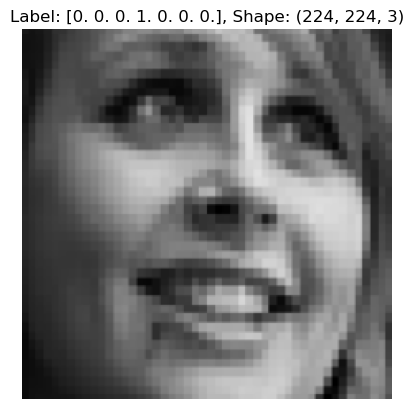

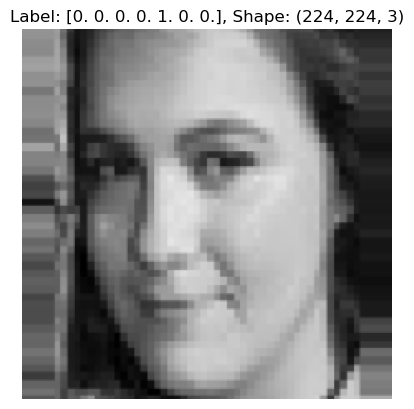

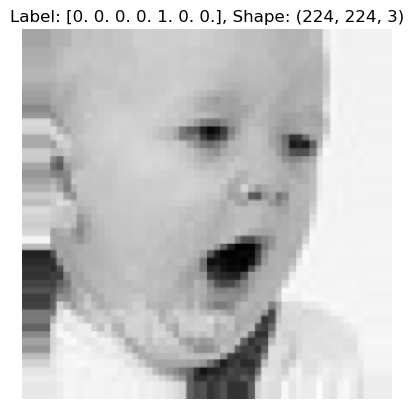

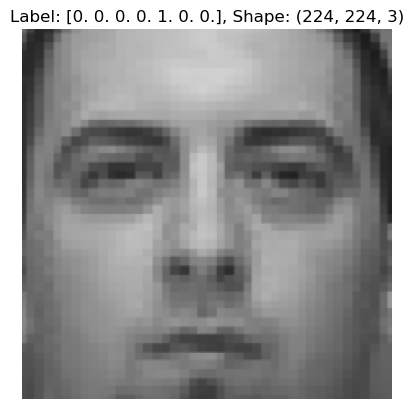

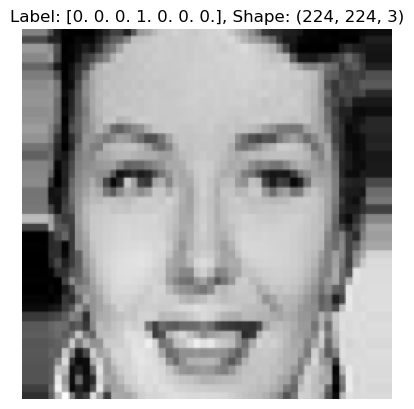

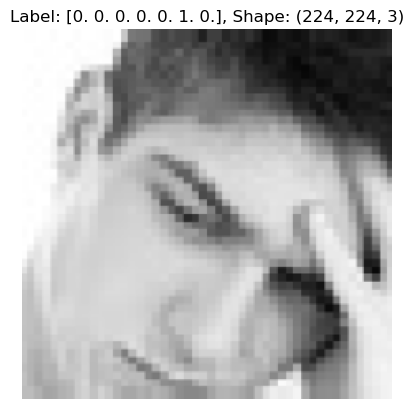

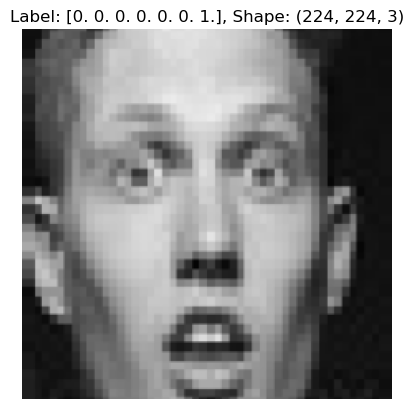

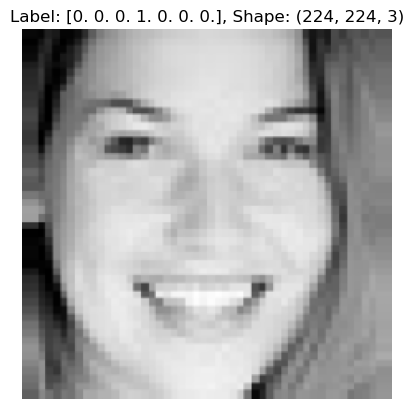

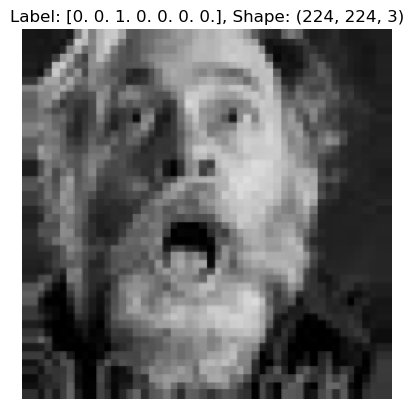

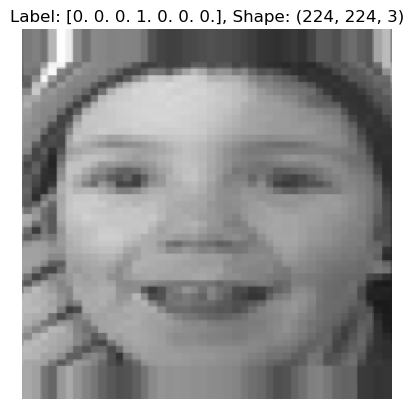

In [75]:
t_img, label = next(train_data)

import matplotlib.pyplot as plt

def plotImages(img_arr, label):
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im, cmap='gray')
        plt.title(f"Label: {l}, Shape: {im.shape}")
        plt.axis('off')
        plt.show()
        
        count += 1
        if count == 10:
            break

plotImages(t_img, label)

# **Using MobileNet for its pre-trained weights**


In [ ]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### **Creating our model**


In [78]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# **Training the model**

In [81]:
hist = model.fit(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 100, 
                           validation_data= val_data, 
                           validation_steps= 10)

Epoch 1/100


C:\Users\priyu\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.1886 - loss: 16.2656 - val_accuracy: 0.3031 - val_loss: 13.7088
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2907 - loss: 12.3063 - val_accuracy: 0.4250 - val_loss: 9.8158
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3594 - loss: 9.3597 - val_accuracy: 0.4031 - val_loss: 6.8967
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3894 - loss: 7.9540 - val_accuracy: 0.4750 - val_loss: 4.6502
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4589 - loss: 5.0060 - val_accuracy: 0.3875 - val_loss: 5.1902
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3893 - loss: 5.9849 - val_accuracy: 0.4031 - val_loss: 4.8992
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3337 - loss: 5.8031 - val_accuracy: 0.3594 - val_loss: 5.0515
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3816 - loss: 5.2860 - val_accuracy: 0.4375 - val_loss: 

c:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5169 - loss: 5.5894 - val_accuracy: 0.4594 - val_loss: 6.5667
Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4465 - loss: 6.5926 - val_accuracy: 0.4531 - val_loss: 6.1840
Epoch 26/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4422 - loss: 5.9390 - val_accuracy: 0.4437 - val_loss: 5.7650
Epoch 27/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4434 - loss: 7.4101 - val_accuracy: 0.3719 - val_loss: 8.2709
Epoch 28/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4086 - loss: 6.6878 - val_accuracy: 0.4875 - val_loss: 5.6556
Epoch 29/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4602 - loss: 6.3892 - val_accuracy: 0.4844 - val_loss: 5.7306
Epoch 30/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4430 - loss: 5.8866 - val_accuracy: 0.4406 - val_loss: 6.9350
Epoch 31/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5347 - loss: 5.7998 - val_accuracy: 0.4781 - val_lo

## **Saving the built Model**

In [83]:
# Save the model in h5 format 
model.save('final_model_mobilenet.h5')

## **Train accuracy v/s Testing accuracy**

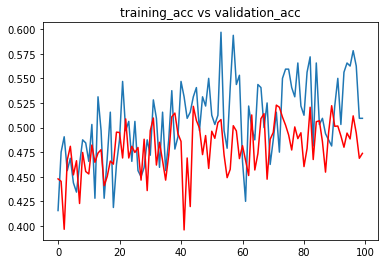

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

## **Training Loss v/s Testing Loss**

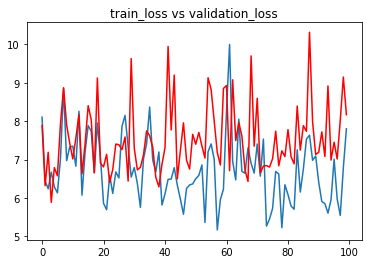

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

## **Testing the model using images**

In [ ]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of angry


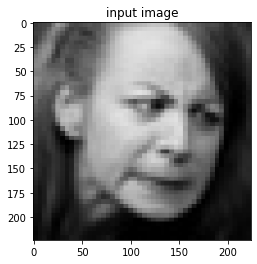

In [ ]:
# path for the image to see if it predics correct class

path = "D:/ML-Nexus/Computer Vision/Face-expression recommendation system/face-expression-recognition-dataset/images/test/angry/10052.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

# **Using CNN built from Scratch**

In [32]:
TRAIN_DIR = 'D:/ML-Nexus/Computer Vision/Face-expression recommendation system/face-expression-recognition-dataset/images/train'
TEST_DIR = 'D:/ML-Nexus/Computer Vision/Face-expression recommendation system/face-expression-recognition-dataset/images/test'

In [33]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [34]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [35]:
print(train)

                                                   image     label
0      D:/ML-Nexus/Computer Vision/Face-expression re...     angry
1      D:/ML-Nexus/Computer Vision/Face-expression re...     angry
2      D:/ML-Nexus/Computer Vision/Face-expression re...     angry
3      D:/ML-Nexus/Computer Vision/Face-expression re...     angry
4      D:/ML-Nexus/Computer Vision/Face-expression re...     angry
...                                                  ...       ...
28816  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
28817  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
28818  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
28819  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
28820  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise

[28821 rows x 2 columns]


In [36]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [37]:
print(test)
print(test['image'])

                                                  image     label
0     D:/ML-Nexus/Computer Vision/Face-expression re...     angry
1     D:/ML-Nexus/Computer Vision/Face-expression re...     angry
2     D:/ML-Nexus/Computer Vision/Face-expression re...     angry
3     D:/ML-Nexus/Computer Vision/Face-expression re...     angry
4     D:/ML-Nexus/Computer Vision/Face-expression re...     angry
...                                                 ...       ...
7061  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
7062  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
7063  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
7064  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise
7065  D:/ML-Nexus/Computer Vision/Face-expression re...  surprise

[7066 rows x 2 columns]
0       D:/ML-Nexus/Computer Vision/Face-expression re...
1       D:/ML-Nexus/Computer Vision/Face-expression re...
2       D:/ML-Nexus/Computer Vision/Face-expression re...
3       D

In [38]:
test['image']

0       D:/ML-Nexus/Computer Vision/Face-expression re...
1       D:/ML-Nexus/Computer Vision/Face-expression re...
2       D:/ML-Nexus/Computer Vision/Face-expression re...
3       D:/ML-Nexus/Computer Vision/Face-expression re...
4       D:/ML-Nexus/Computer Vision/Face-expression re...
                              ...                        
7061    D:/ML-Nexus/Computer Vision/Face-expression re...
7062    D:/ML-Nexus/Computer Vision/Face-expression re...
7063    D:/ML-Nexus/Computer Vision/Face-expression re...
7064    D:/ML-Nexus/Computer Vision/Face-expression re...
7065    D:/ML-Nexus/Computer Vision/Face-expression re...
Name: image, Length: 7066, dtype: object

In [39]:
from tqdm.notebook import tqdm

In [43]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [46]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [47]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [48]:
x_train = train_features/255.0
x_test = test_features/255.0

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [51]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [52]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [57]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\priyu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test)) 

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 163s 721ms/step - accuracy: 0.2485 - loss: 1.8141 - val_accuracy: 0.2474 - val_loss: 1.7759
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 167s 741ms/step - accuracy: 0.2652 - loss: 1.7614 - val_accuracy: 0.3428 - val_loss: 1.6140
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 162s 716ms/step - accuracy: 0.3547 - loss: 1.6208 - val_accuracy: 0.4413 - val_loss: 1.4389
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 165s 732ms/step - accuracy: 0.4107 - loss: 1.5052 - val_accuracy: 0.4875 - val_loss: 1.3462
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 675ms/step - accuracy: 0.4446 - loss: 1.4315 - val_accuracy: 0.5048 - val_loss: 1.3081
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 632ms/step - accuracy: 0.4617 - loss: 1.3840 - val_accuracy: 0.5109 - val_loss: 1.2659
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 632ms/step - accuracy: 0.4815 - loss: 1.3489 - val_accuracy: 0.5212 - val_loss: 1.2462
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 627ms/step - accuracy: 0.4955 -

In [62]:
model.save("final_model_cnn.h5")

In [63]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step


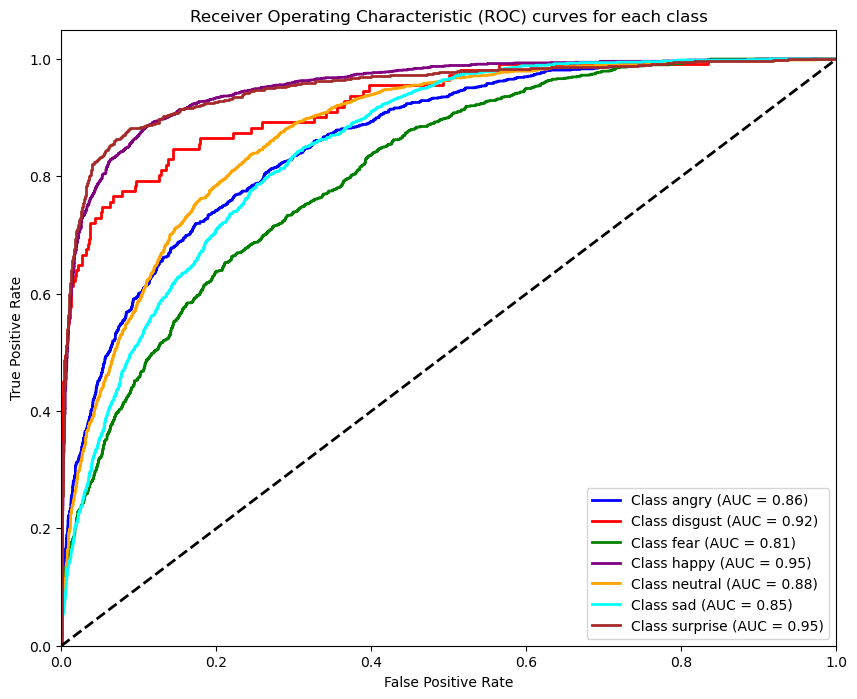

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Get the predictions for the test data
y_score = model.predict(x_test)

# Binarize the output for ROC curve calculation
n_classes = y_test.shape[1]
y_test_binarized = y_test

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {label[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves for each class')
plt.legend(loc="lower right")
plt.show()

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step


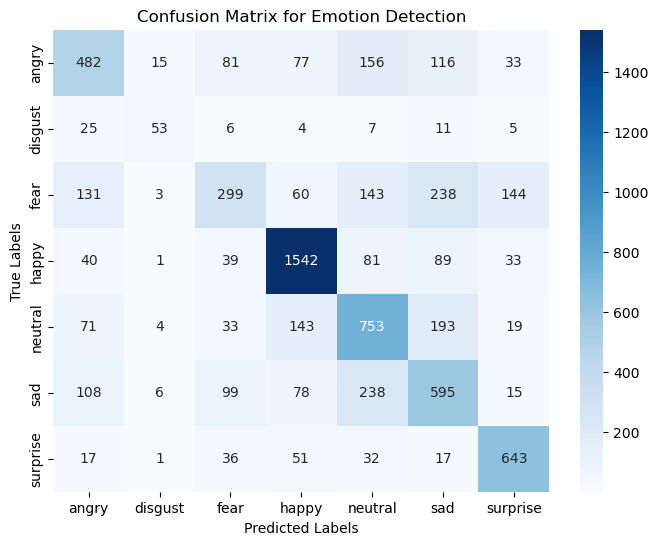

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_test, axis=1)  

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)


label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Emotion Detection')
plt.show()

Accuracy Score: 61.80%


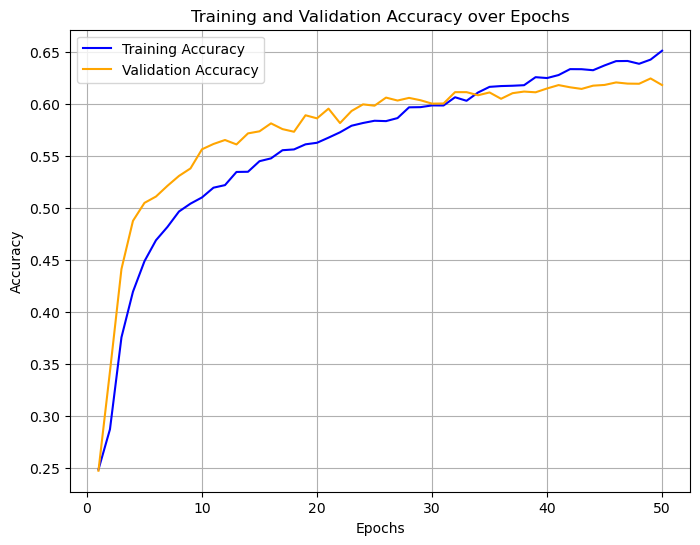

In [66]:
from sklearn.metrics import accuracy_score
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy Score: {accuracy * 100:.2f}%")


import matplotlib.pyplot as plt

# Assuming 'history' is the variable where model.fit() history is stored
# and 'gender_out_accuracy' represents the accuracy for gender classification in your model.

# Extract training and validation accuracy for each epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plotting the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', color='blue')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Training Accuracy: 78.99%
Validation Accuracy: 61.80%


In [68]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanAbsoluteError
import numpy as np

# Load the model with custom objects
model = load_model("final_model_cnn.h5")

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predicting the labels for test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generating the classification report
label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
report = classification_report(true_labels, predicted_labels, target_names=label_names)
print("Classification Report:\n", report)

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.55      0.50      0.53       960
     disgust       0.64      0.48      0.55       111
        fear       0.50      0.29      0.37      1018
       happy       0.79      0.84      0.82      1825
     neutral       0.53      0.62      0.57      1216
         sad       0.47      0.52      0.50      1139
    surprise       0.72      0.81      0.76       797

    accuracy                           0.62      7066
   macro avg       0.60      0.58      0.58      7066
weighted avg       0.61      0.62      0.61      7066

